In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
!pip install twython

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = "/content/drive/MyDrive/Project Dataset (1).csv"
df0=pd.read_csv(path)

In [10]:
df0.describe

<bound method NDFrame.describe of           id  ... target
0          0  ...      1
1          1  ...      1
2          2  ...      1
3          3  ...      1
4          4  ...      0
...      ...  ...    ...
11365  11365  ...      0
11366  11366  ...      0
11367  11367  ...      0
11368  11368  ...      0
11369  11369  ...      1

[11370 rows x 5 columns]>

In [11]:
df0

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [12]:
df=df0[['text']]
df

,text
0,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,Telangana: Section 144 has been imposed in Bha...
2,Arsonist sets cars ablaze at dealership https:...
3,Arsonist sets cars ablaze at dealership https:...
4,"""Lord Jesus, your love brings freedom and pard..."
...,...
11365,Media should have warned us well in advance. T...
11366,i feel directly attacked 💀 i consider moonbin ...
11367,i feel directly attacked 💀 i consider moonbin ...
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T..."


In [13]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [14]:
cleantext=[]
for item in tqdm(df['text']):
    words=tweet_to_words(str(item))
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 11370/11370 [00:33<00:00, 343.97it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,cleantext
0,"Communal violence in Bhainsa, Telangana. ""Ston...","[commun, violenc, bhainsa, telangana, stone, p..."
1,Telangana: Section 144 has been imposed in Bha...,"[telangana, section, 144, impos, bhainsa, janu..."
2,Arsonist sets cars ablaze at dealership https:...,"[arsonist, set, car, ablaz, dealership, http, ..."
3,Arsonist sets cars ablaze at dealership https:...,"[arsonist, set, car, ablaz, dealership, http, ..."
4,"""Lord Jesus, your love brings freedom and pard...","[lord, jesu, love, bring, freedom, pardon, fil..."
...,...,...
11365,Media should have warned us well in advance. T...,"[media, warn, us, well, advanc, wreck, whole, ..."
11366,i feel directly attacked 💀 i consider moonbin ...,"[feel, directli, attack, consid, moonbin, amp,..."
11367,i feel directly attacked 💀 i consider moonbin ...,"[feel, directli, attack, consid, moonbin, amp,..."
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, rememb, outcast, nd, dora, au, au, wreck,..."


In [15]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [16]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [19]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
df2 = compute_vader_scores(df,'cleantext')
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,"Communal violence in Bhainsa, Telangana. ""Ston...","[commun, violenc, bhainsa, telangana, stone, p...",0.000,1.000,0.000,0.0000,commun violenc bhainsa telangana stone pelt mu...
1,Telangana: Section 144 has been imposed in Bha...,"[telangana, section, 144, impos, bhainsa, janu...",0.205,0.795,0.000,-0.5574,telangana section 144 impos bhainsa januari 13...
2,Arsonist sets cars ablaze at dealership https:...,"[arsonist, set, car, ablaz, dealership, http, ...",0.000,1.000,0.000,0.0000,arsonist set car ablaz dealership http co goqv...
3,Arsonist sets cars ablaze at dealership https:...,"[arsonist, set, car, ablaz, dealership, http, ...",0.000,1.000,0.000,0.0000,arsonist set car ablaz dealership http co 0gl7...
4,"""Lord Jesus, your love brings freedom and pard...","[lord, jesu, love, bring, freedom, pardon, fil...",0.000,0.470,0.530,0.9081,lord jesu love bring freedom pardon fill holi ...
...,...,...,...,...,...,...,...
11365,Media should have warned us well in advance. T...,"[media, warn, us, well, advanc, wreck, whole, ...",0.321,0.522,0.157,-0.2960,media warn us well advanc wreck whole night re...
11366,i feel directly attacked 💀 i consider moonbin ...,"[feel, directli, attack, consid, moonbin, amp,...",0.492,0.508,0.000,-0.8658,feel directli attack consid moonbin amp jinjin...
11367,i feel directly attacked 💀 i consider moonbin ...,"[feel, directli, attack, consid, moonbin, amp,...",0.427,0.573,0.000,-0.8658,feel directli attack consid moonbin amp jinjin...
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, rememb, outcast, nd, dora, au, au, wreck,...",0.180,0.683,0.137,-0.1779,ok rememb outcast nd dora au au wreck nerv nd ...


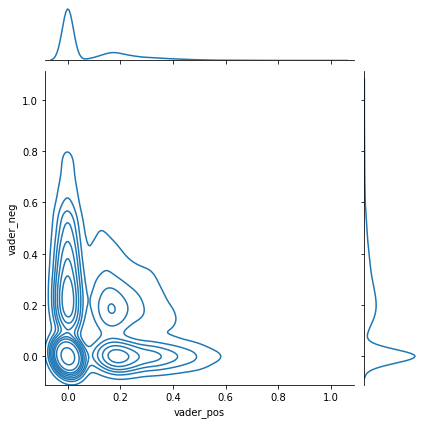

In [21]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neg', kind="kde")

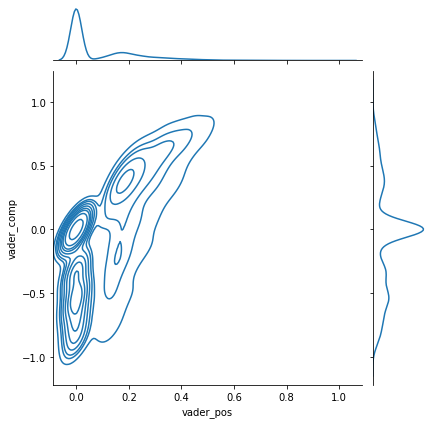

In [22]:
sns.jointplot(data=df2, x='vader_pos', y='vader_comp', kind="kde")

In [23]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_pos']>0.1:
        class0+=[2]
    elif df2.loc[i,'vader_neg']>0.1:
        class0+=[0]        
    else:
        class0+=[1]    

In [24]:
print(len(df))
print(len(df2))

11370
11370


In [25]:
df2['class']=class0
df2['class'].value_counts()

2    3996
0    3689
1    3685
Name: class, dtype: int64

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
 commun violenc bhainsa telangana stone pelt muslim hous hous vehicl set ablaz 
After Tokenization & Padding 
 [ 413  736 1503 1370  941 3092  380   83   83  484  170  905    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [27]:
print(X.shape)

(11370, 50)


In [28]:
y = pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (6822, 50) (6822, 3)
Validation Set:  (2274, 50) (2274, 3)
Test Set:  (2274, 50) (2274, 3)


In [29]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [31]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [32]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


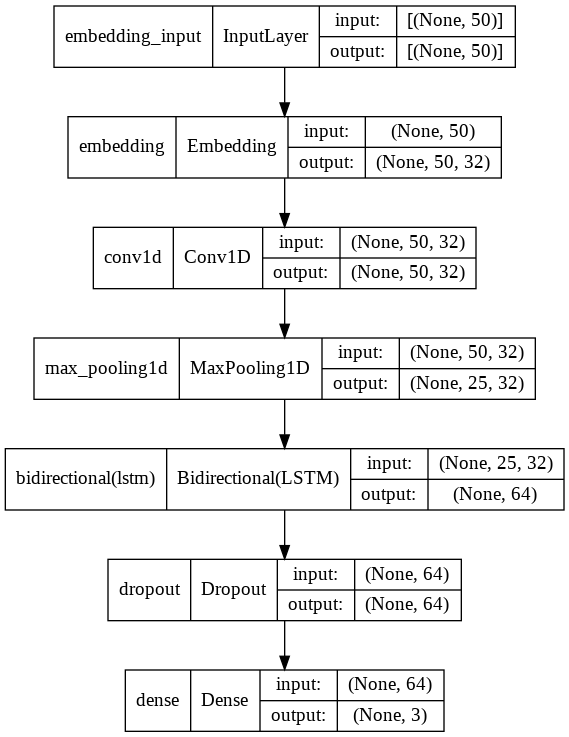

In [33]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [35]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
107/107 [==============================] - 13s 38ms/step - loss: 1.1004 - accuracy: 0.3459 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0971 - val_accuracy: 0.3553 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
107/107 [==============================] - 3s 27ms/step - loss: 1.0962 - accuracy: 0.3549 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0940 - val_accuracy: 0.3887 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
107/107 [==============================] - 3s 27ms/step - loss: 1.0928 - accuracy: 0.3685 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0885 - val_accuracy: 0.3874 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
107/107 [==============================] - 4s 34ms/step - loss: 1.0886 - accuracy: 0.3868 - precision: 0.6154 - recall: 0.0012 - val_loss: 1.0838 - val_accuracy: 0.4019 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
107/107 [=======================

In [36]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

Accuracy  : 0.4178
Precision : 0.6849
Recall    : 0.0220
F1 Score  : 0.0426


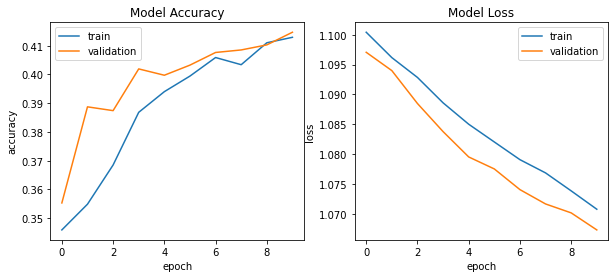

In [37]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

2    832
1    727
0    715
dtype: int64
2    1523
1     751
dtype: int64


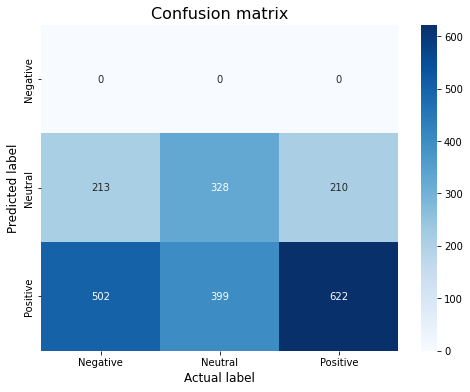

In [38]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes =   ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))

    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)